# Exploration of Spotify API Data
## Setting Up Notebook

In [1]:
# import modules
import prepare
import preprocessing

# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reading current data into df variable
df = pd.read_csv('full-playlist.csv', index_col=0)

In [3]:
# removing nulls in release date, songs that only have year and not month or day are filled with 01
df = prepare.prepare_df(df)

In [4]:
df = preprocessing.get_top_ten_labels(df)

In [5]:
# looking at initial df
df.head()

,release_year,release_month,release_day,artist,album,release_date,track_name,album_popularity,label,danceability,...,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,decade,is_top_billboard_label,top_ten_label
track_id,,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,2020,07,12,tay-k,trapman,2020-07-12,trapman,36,Tay-K,0.792,...,1,1,2J1hMj78HfdcMrmL2Sk6eR,single,232,3,0,2020s,0,0
5PtMwNq8Dp31uYdGGacVJE,2003,03,04,lil wyte,doubt me now,2003-03-04,oxy cotton,55,Hypnotize Minds Productions,0.816,...,1,11,2lwxcemR1muymEHNMblCpm,album,193,3,0,2000s,0,0
6s8EhlBn2PIoESylkXnwYc,2019,11,29,kamelen,kingpin slim,2019-11-29,kingpin o.g - remix,46,NMG/G-HUSET,0.649,...,1,11,6va2RTYO2ois7t88RN0LhJ,album,254,4,0,2010s,0,0
2e9EZ2V5QGGZPMJacO3y0Y,2010,10,01,waka flocka flame,flockaveli,2010-10-01,grove st. party (feat. kebo gotti),71,Asylum/Warner Records,0.705,...,1,9,6MQtWELG7aRX7CkAzQ6nLM,album,250,4,1,2010s,0,0
3ZRd5Z0fiYtASLdEPPb16m,2001,02,13,project pat,mista don't play: everythangs workin',2001-02-13,don't save her (feat. crunchy black),55,Hypnotize Minds Productions,0.838,...,1,5,4QzaueQPQa0lqrMmQoh4v0,album,261,4,1,2000s,0,0


In [6]:
# splitting into train, validate, test to explore on train only
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = preprocessing.spotify_split(df, 'popularity')

Shape of train: (4012, 32) | Shape of validate: (861, 32) | Shape of test: (860, 32)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


In [7]:
# looking at train df
train.head()

,release_year,release_month,release_day,artist,album,release_date,track_name,album_popularity,label,danceability,...,disc_number,track_number,album_id,album_type,duration_seconds,duration_minutes,is_featured_artist,decade,is_top_billboard_label,top_ten_label
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,2019,04,19,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,...,1,1,1dEpGPZONvmwYlE2jDOWOM,single,142,2,0,2010s,0,0
0HO8pCseEpgozNi3z0R4bc,2015,03,17,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,...,1,11,1ecx4skUBpk31GDJlMXi3X,album,120,2,0,2010s,0,0
643K3eEgRvdJiXjSzlz7dg,1998,08,11,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,...,1,2,3kaX938EVrZuYE1JpNhZIW,album,252,4,0,90s,0,0
08EabdvPIHC4KBW7LfynPP,1993,10,12,salt-n-pepa,very necessary,1993-10-12,no one does it better,64,Mercury Records,0.874,...,1,2,2W2EmEpud13QHlhCFS9P8g,album,234,3,0,90s,0,0
6B2ZDVgJ0lHLgV9xC2PAJh,2001,10,22,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),42,Arista,0.857,...,1,9,2n4GKr0nKfFWoSTWZuNB9Z,album,266,4,1,2000s,0,0


## Binning Features

Popularity bins

In [19]:
# manually bin popularity for use in visualization
bin_labels = ['Very Low', 'Low', 'Moderate', 'High']
#bin_labels = ['0 to 10', '11 to 40', '41 to 70', '71 to 100']
bins = [-1, 11, 41, 71, 101]
train['popularity_bins'] = pd.cut(x=train.popularity, labels=bin_labels, bins=bins, right=True)

Next, will create bins for year release date

In [20]:
train['release_year'] = train.release_year.astype('int')

In [21]:
# will bin release_year by 6 equal parts
train['release_year_bins'] = pd.qcut(train.release_year, 6, duplicates='drop', labels=['1983_2003','2004_2011','2012_2016','2017_2018','2019_2020'])

pandas qcut duplicates parameter
- duplicates{default ‘raise’, ‘drop’}, optional
- If bin edges are not unique, raise ValueError or drop non-uniques.

In [22]:
# the values from binning
pd.qcut(train.release_year, 6, duplicates='drop').value_counts()

(2018.0, 2020.0]      1313
(2012.0, 2017.0]       961
(2003.0, 2012.0]       706
(1982.999, 2003.0]     685
(2017.0, 2018.0]       347
Name: release_year, dtype: int64

## Binning Year by Decade
- function in preprocessing creates a feature for what decade the track was releaed

In [23]:
train.decade.value_counts()

2010s    1942
2020s     922
2000s     766
90s       343
80s        39
Name: decade, dtype: int64

# Visualizing Release Date vs. Popularity

In [24]:
# sorting by oldest year first, keeps original index of train but resorted
train_sort_date = train.sort_values(by=['release_date'])

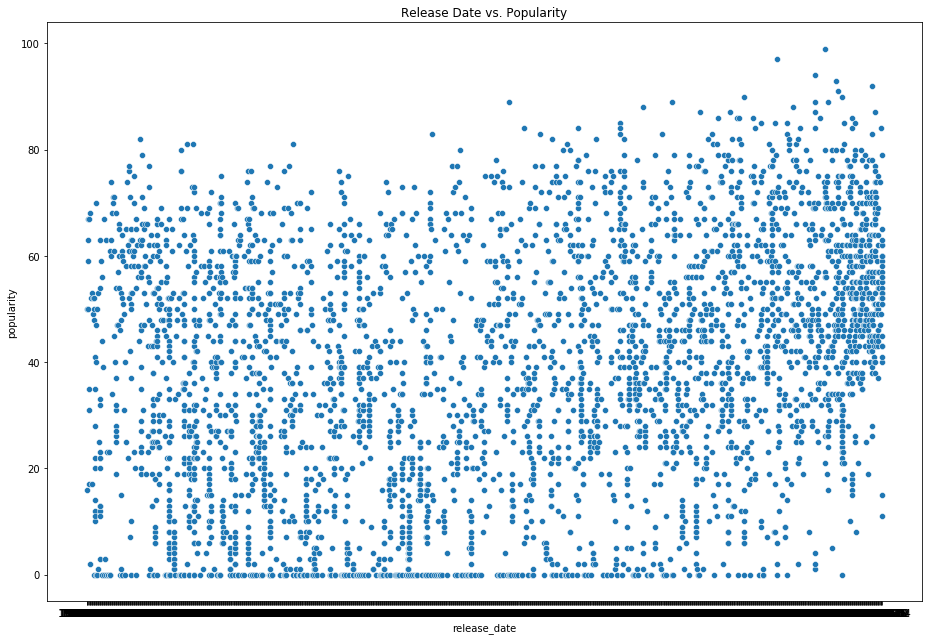

In [25]:
# visualizing each observation by release date and popularity
plt.figure(figsize=(13,9))

sns.scatterplot(x=train_sort_date.release_date, y=train_sort_date.popularity)
plt.title('Release Date vs. Popularity')

plt.tight_layout()

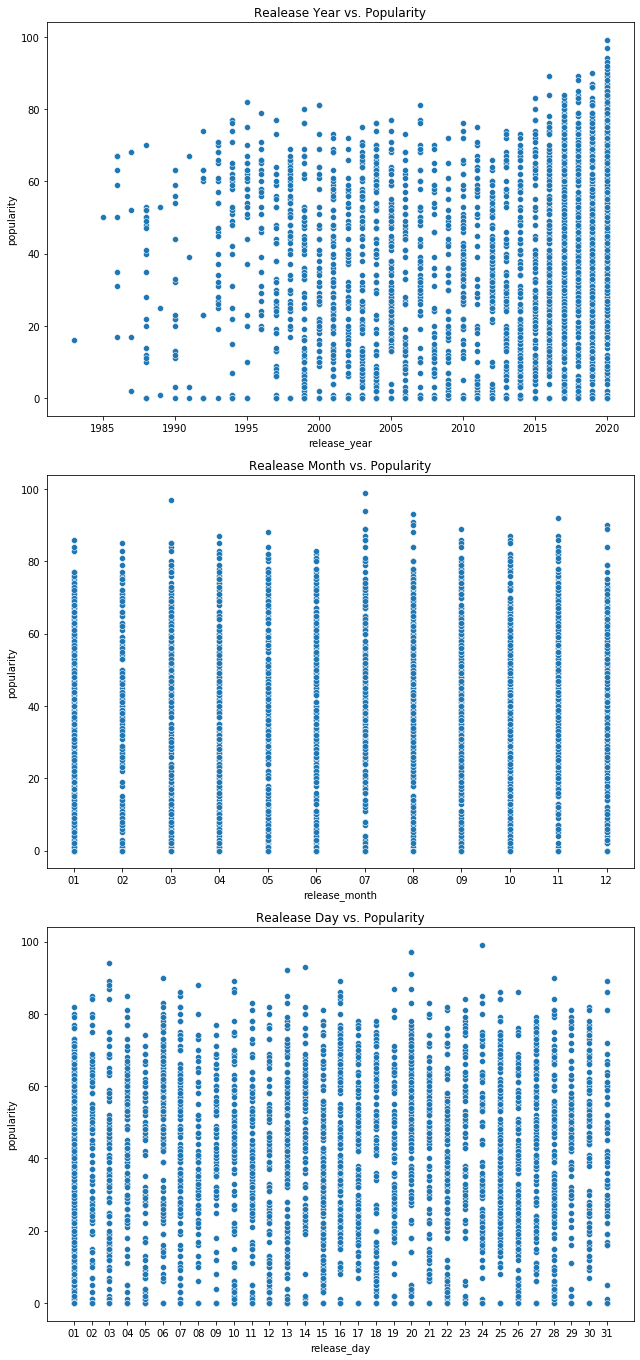

In [26]:
# visualzing release date split by year, month, and day
plt.figure(figsize=(9,19))

plt.subplot(3,1,1)

# sorting by oldest year first, keeps original index
train_sort_year = train.sort_values(by=['release_year'])
sns.scatterplot(x=train_sort_year.release_year, y=train_sort_year.popularity)
plt.title('Realease Year vs. Popularity')

plt.subplot(3,1,2)
# sorting by lowest month first, keeps original index
train_sort_month = train.sort_values(by=['release_month'])
sns.scatterplot(x=train_sort_month.release_month, y=train_sort_month.popularity)
plt.title('Realease Month vs. Popularity')

plt.subplot(3,1,3)
# sorting by lowest day first, keeps original index
train_sort_day = train.sort_values(by=['release_day'])
sns.scatterplot(x=train_sort_day.release_day, y=train_sort_day.popularity)
plt.title('Realease Day vs. Popularity')

plt.tight_layout()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


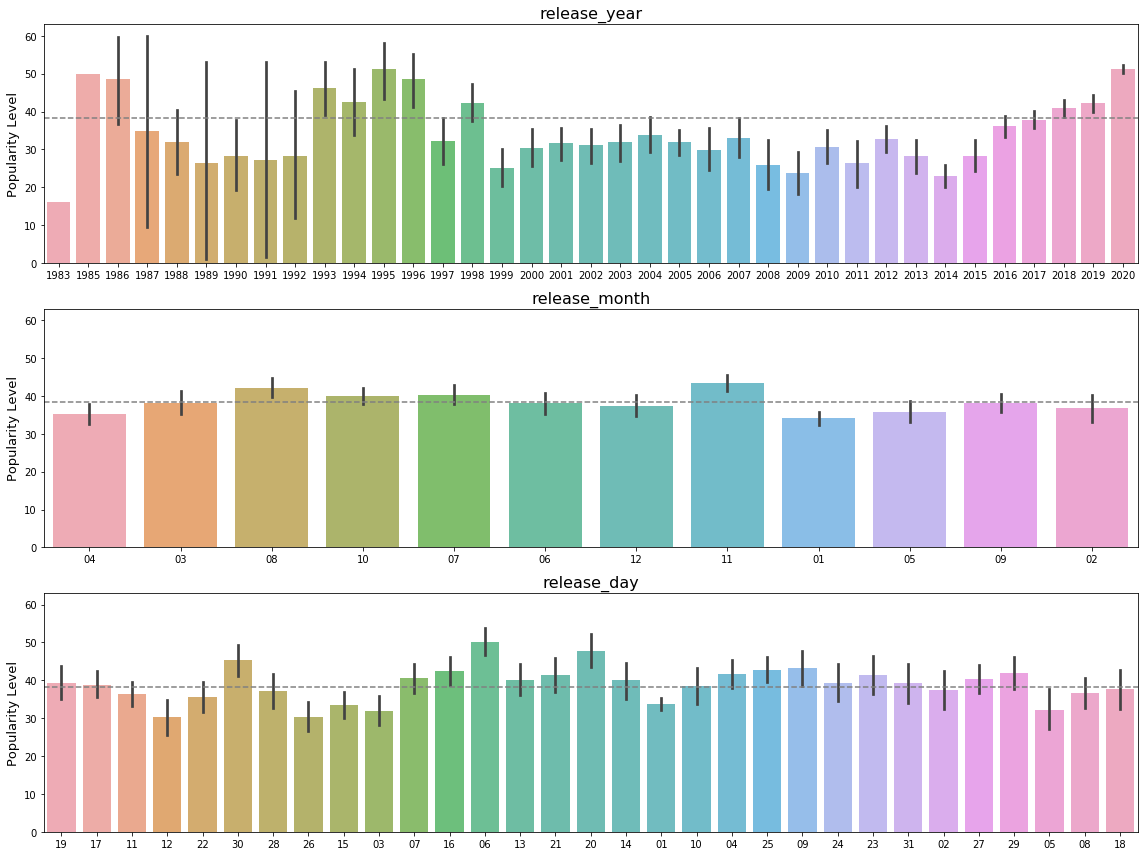

In [27]:
# visualizing average popularity by each features category
features = ['release_year', 'release_month', 'release_day']

# to plot reference line of overall train average popularity
survival_rate = train.popularity.mean()

# plots the average of each features subgroups as bar plots
_, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12), sharey=True)
for i, feature in enumerate(features):
    
    sns.barplot(feature, 'popularity', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Popularity Level', size=13)
    ax[i].set_title(feature, size=16)
    ax[i].axhline(survival_rate, ls='--', color='grey')
    plt.tight_layout()

It appears a song release year influences popularity more than the specific day. Songs released recently and in a few older years visually look to be more popular than older songs. Why do some days appear significantly above/below the average? Could it be more observations were released on these days?
- Will statistical testing reflect release year influencing popularity? 
- Would binning the release year help to visualize this (though will cost granularity)?

### Is November a good month to release a hip hop song?
- chi squared contingency test if using november and popularity bin
- t-test is using november and popularity non-binned

In [28]:
train.release_month.value_counts()

01    589
11    452
10    413
09    380
08    321
05    296
03    296
07    292
04    273
06    269
12    252
02    179
Name: release_month, dtype: int64

In [29]:
train['is_november'] = train.release_month == '11'
train['high_popularity'] = train.popularity_bins == 'high'

In [30]:
observed = pd.crosstab(train.is_november, train.high_popularity)
observed

high_popularity,False
is_november,
False,3560
True,452


In [33]:
from scipy import stats
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[3560]
 [ 452]]
---
Expected

[[3560.]
 [ 452.]]
---

chi^2 = 0.0000
p     = 1.0000


Next, will visualize the interaction of year with popularity using the binned features

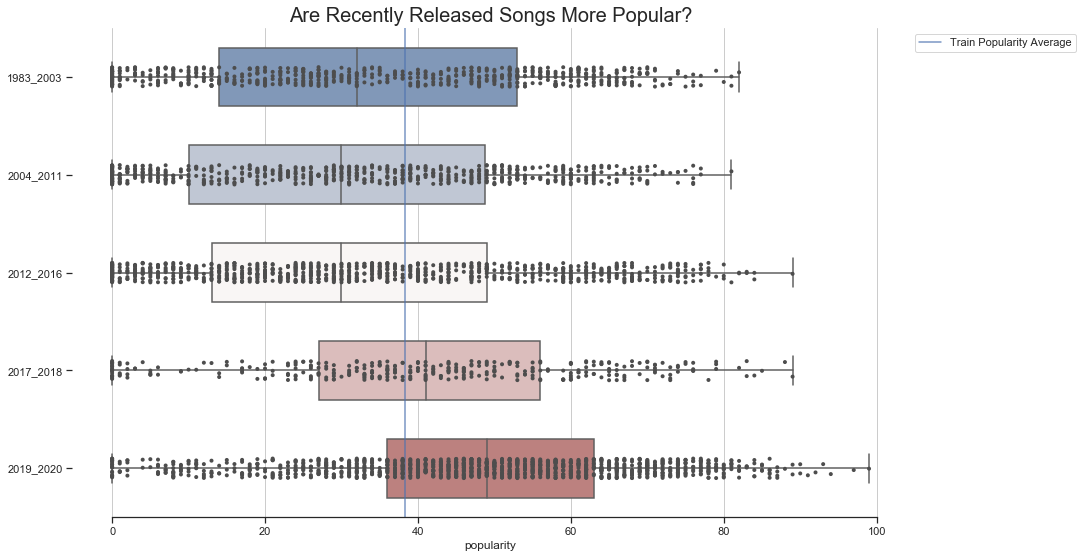

In [34]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="popularity", y="release_year_bins", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# reference line for overall popularity average
plt.axvline(train.popularity.mean(), alpha=.75, label='Train Popularity Average')

plt.title('Are Recently Released Songs More Popular?', size=20)

# Add in points to show each observation
sns.stripplot(x="popularity", y="release_year_bins", data=train,
              size=4, color=".3", linewidth=0)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


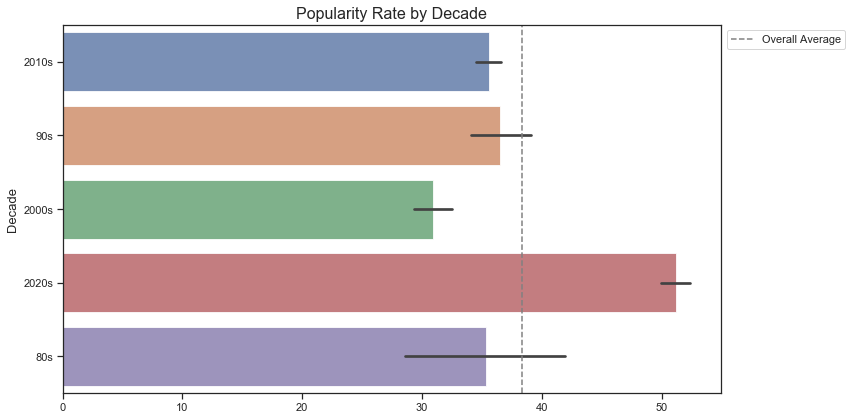

In [35]:
# to plot reference line of overall train average popularity
popularity_rate = train.popularity.mean()

plt.figure(figsize=(12,6))

# plots the average of each features subgroups as bar plots
sns.barplot('popularity', 'decade', data=train, alpha=.8)
plt.xlabel('')
plt.ylabel('Decade', size=13)
plt.title('Popularity Rate by Decade', size=16)
plt.axvline(popularity_rate, ls='--', color='grey', label='Overall Average')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

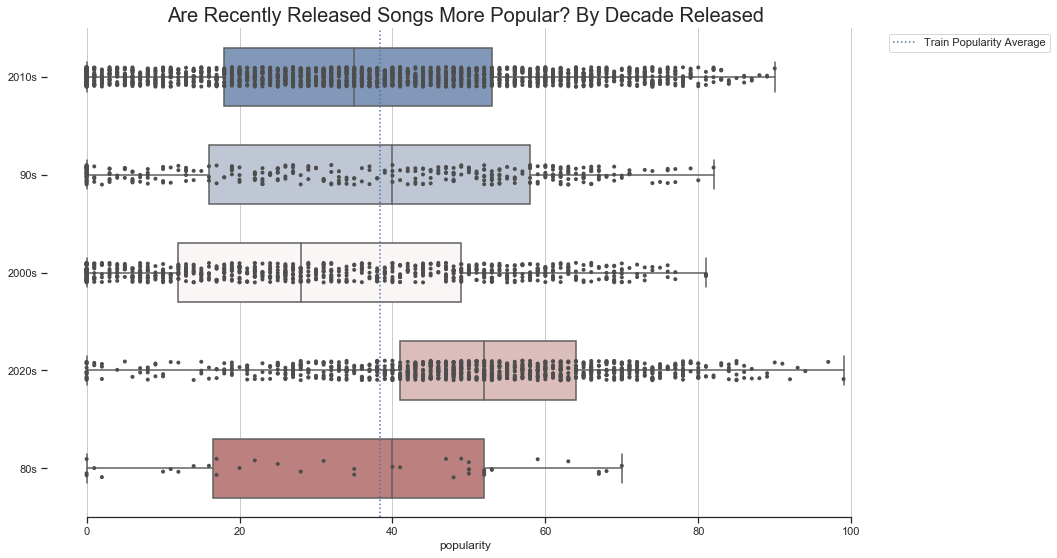

In [36]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="popularity", y="decade", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# reference line for overall popularity average
plt.axvline(train.popularity.mean(), linestyle=':',label='Train Popularity Average')

plt.title('Are Recently Released Songs More Popular? By Decade Released', size=20)

# Add in points to show each observation
sns.stripplot(x="popularity", y="decade", data=train,
              size=4, color=".3", linewidth=0)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Notes:
- only 55 observations in the 80s decade
- The 80s and 2000s are the only deades with a median below the overall popularity average
- Songs released in 2020 have the highest median

## Statistically Testing Release Date vs. Popularity

In [37]:
# calculating an alpha level
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
a = 1 - conf_interval
print('Hypothesis Testing Alpha:',round(a,2))

Hypothesis Testing Alpha: 0.05


1. Peirson's Correlation Test
    - checks if two samples are linearly correlated
    - uses two continuous variables
    - will use release year and popularity

#### Popularity vs. Release Year
Null hypothesis: There is no linear correlation between song popularity and release year.    

Alternative hypotesis: There is a linear correlation between song popularity and release year. For example, songs with newer release dates have higher popularity.

In [38]:
# determining correlation of two continuous values: popularity and release year
corr, p = stats.pearsonr(train.release_year, train.popularity)

print('The correlation coefficient of train release year vs. popularity:', round(corr,4))
print('The p-value of the coefficient:', round(p,4))
print('Is p-value less than alpha?', p < a)

The correlation coefficient of train release year vs. popularity: 0.2007
The p-value of the coefficient: 0.0
Is p-value less than alpha? True


Because p is low (less than alpha), we can reject the null hypothesis. There is a significant linear correlation between release year and popularity. With the coefficient being positive, we can say this correlation is positive and that as release year increases (closer to current year) the song popularity increases.

2. One-sample T-test
    - checks if significant difference between a subgroup and the whole average
    - compare a categorical and a continuous variable
    - needs to be a normally distributed variable
    
$H_0$: there is no difference between songs released in 2020 popularity and the overall average.  
$H_a$: there is a difference between songs released in 2020 popularity and the overall average.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2553: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Train Popularity')

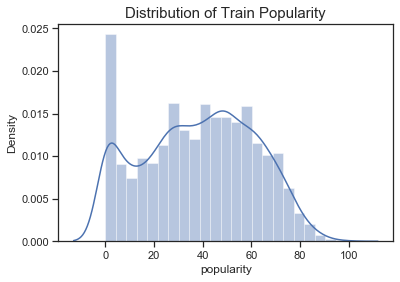

In [39]:
# checking distribution of popularity before using t-test
sns.distplot(train.popularity)
plt.title('Distribution of Train Popularity', size=15)

In [40]:
print('popularity average:', train.popularity.mean(), '\npopularity median:', train.popularity.median())

popularity average: 38.33150548354935 
popularity median: 40.0


In [41]:
# the variable is close to normally distributed, we can continue with the t-test
from scipy.stats import ttest_1samp

t, p = stats.ttest_1samp(train[train.decade == '2020s'].popularity, train.popularity.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')
print('Is p-value less than alpha?', p < a)

t = 21.196
p = 0.000
Is p-value less than alpha? True


# Visualizing Danceability vs. Popularity

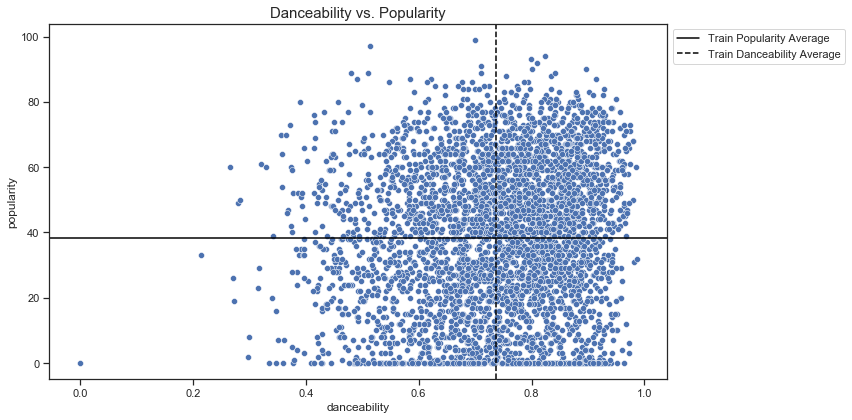

In [42]:
# visualizing each observation by release date and popularity
plt.figure(figsize=(12,6))

sns.scatterplot(x=train.danceability, y=train.popularity)
# reference line for overall popularity average
plt.axhline(train.popularity.mean(),label='Train Popularity Average', color='black')
plt.axvline(train.danceability.mean(), linestyle='--',label='Train Danceability Average', color='black')

plt.title('Danceability vs. Popularity', size=15)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

In [43]:
# bin danceability for better visualizing
train['dance_bins'] = pd.qcut(x=train.danceability, q=3, labels=['low','medium','high'])

danaceability bins for equal cuts
- [(-0.001, 0.696] < (0.696, 0.809] < (0.809, 0.986]]
- low, medium, high

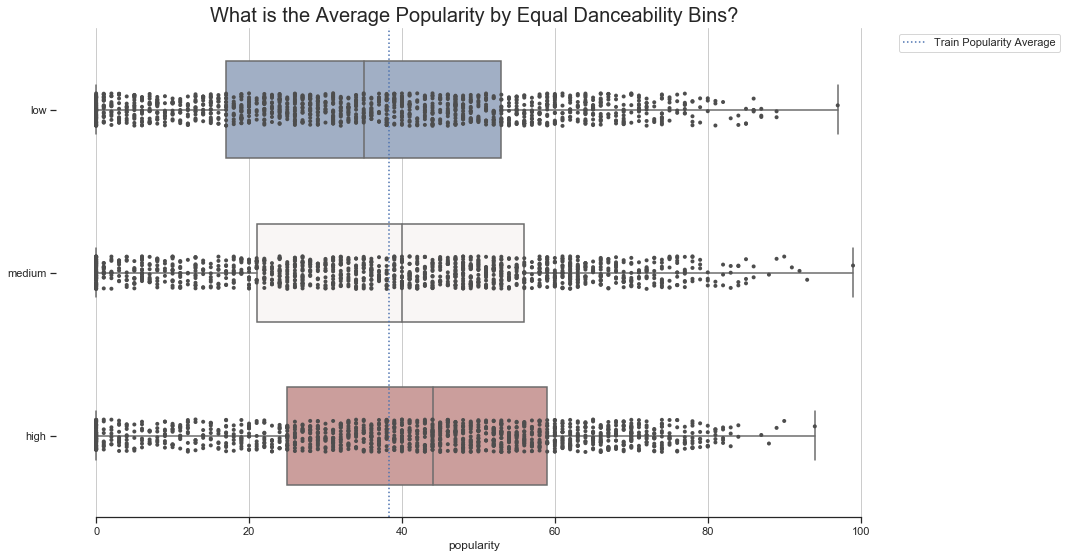

In [44]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 9))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="popularity", y="dance_bins", data=train,
            whis=[0, 100], width=.6, palette="vlag")

# reference line for overall popularity average
plt.axvline(train.popularity.mean(), linestyle=':',label='Train Popularity Average')

plt.title('What is the Average Popularity by Equal Danceability Bins?', size=20)

# Add in points to show each observation
sns.stripplot(x="popularity", y="dance_bins", data=train,
              size=4, color=".3", linewidth=0)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# Tweak the visual presentation
plt.ylabel('Dancability Bin')
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


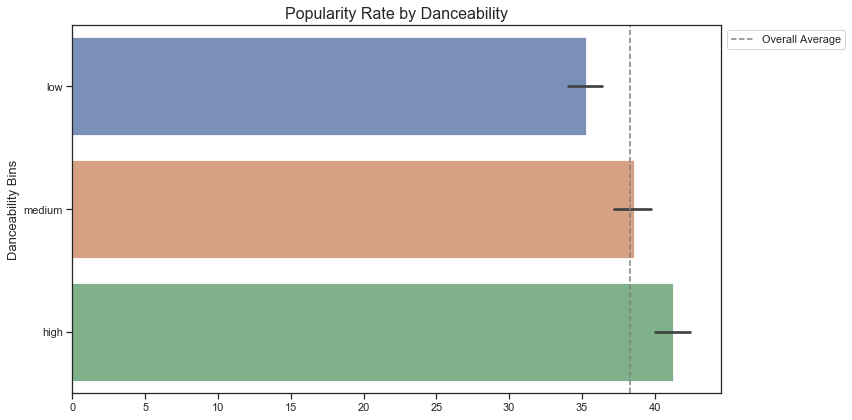

In [45]:
# to plot reference line of overall train average popularity
popularity_rate = train.popularity.mean()

plt.figure(figsize=(12,6))

# plots the average of each features subgroups as bar plots
sns.barplot('popularity', 'dance_bins', data=train, alpha=.8)
plt.xlabel('')
plt.ylabel('Danceability Bins', size=13)
plt.title('Popularity Rate by Danceability', size=16)
plt.axvline(popularity_rate, ls='--', color='grey', label='Overall Average')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

### Statistically Test
- Danceability vs. Popularity
- Two continuous variables - peirson's coefficient correlation test

In [46]:
from scipy import stats
# determining correlation of two continuous values: popularity and release year
corr, p = stats.pearsonr(train.danceability, train.popularity)

print('The correlation coefficient of train release year vs. popularity:', round(corr,4))
print('The p-value of the coefficient:', round(p,4))
print('Is p-value less than alpha?', p < a)

The correlation coefficient of train release year vs. popularity: 0.1101
The p-value of the coefficient: 0.0
Is p-value less than alpha? True


## Clustering Features
- trying to find possible clusters using binned features as hue in scatter plot

features to find clusters on: 
- 'danceability'
- 'energy'
- 'key'
- 'loudness'
- 'mode'
- 'speechiness'
- 'instrumentalness'
- 'liveness'
- 'valence'
- 'tempo'
- 'duration_ms'
- 'time_signature'
- 'explicit'
- 'popularity'

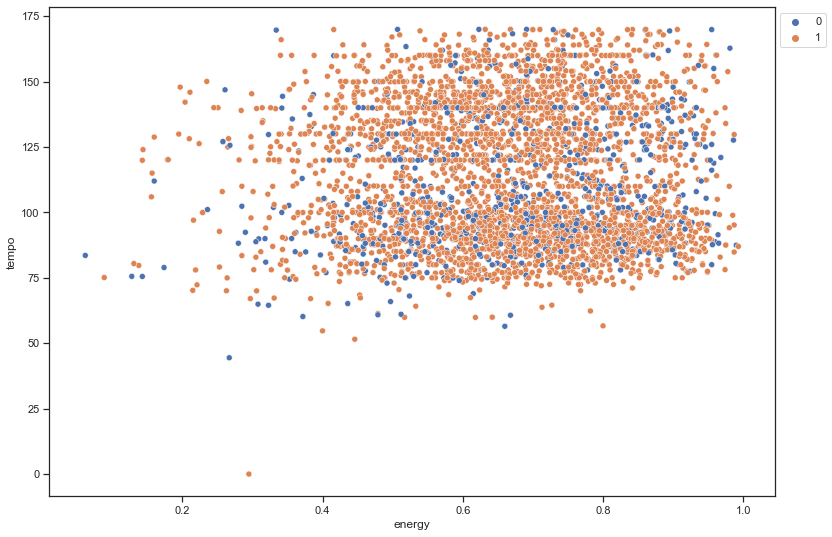

In [47]:
plt.figure(figsize=(13,9))
sns.scatterplot(x='energy', y='tempo', data=train, hue='explicit')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [48]:
train

,release_year,release_month,release_day,artist,album,release_date,track_name,album_popularity,label,danceability,...,duration_minutes,is_featured_artist,decade,is_top_billboard_label,top_ten_label,release_year_bins,is_november,popularity_bins,high_popularity,dance_bins
track_id,,,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,2019,04,19,lil peep,star shopping,2019-04-19,star shopping,80,Lil Peep,0.585,...,2,0,2010s,0,0,2019_2020,False,High,False,low
0HO8pCseEpgozNi3z0R4bc,2015,03,17,father,who's gonna get fucked first?,2015-03-17,everybody in the club gettin shot,26,Awful Records,0.833,...,2,0,2010s,0,0,2012_2016,False,Low,False,high
643K3eEgRvdJiXjSzlz7dg,1998,08,11,m.o.p.,first family 4 life,1998-08-11,breakin' the rules,36,Relativity Records,0.471,...,4,0,90s,0,0,1983_2003,False,Low,False,low
08EabdvPIHC4KBW7LfynPP,1993,10,12,salt-n-pepa,very necessary,1993-10-12,no one does it better,64,Mercury Records,0.874,...,3,0,90s,0,0,1983_2003,False,Low,False,high
6B2ZDVgJ0lHLgV9xC2PAJh,2001,10,22,dungeon family,even in darkness,2001-10-22,white gutz (feat. bubba sparxxx),42,Arista,0.857,...,4,1,2000s,0,0,1983_2003,False,Low,False,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6Hf3lTdh7gNQO3GoVw9CEM,2020,11,06,bree runway,2000and4eva,2020-11-06,little nokia,54,EMI,0.708,...,2,0,2020s,0,0,2019_2020,True,Moderate,False,medium
1HnYtO4YEAMf98bu3hiYNA,2017,01,13,nadia rose,highly flammable,2017-01-13,poltergeist (feat. alika),38,Relentless Records,0.457,...,3,1,2010s,0,0,2012_2016,False,Low,False,low
0IShCbw4JJEpcmZiTwAena,2018,05,30,tierra whack,whack world,2018-05-30,dr. seuss,64,Tierra Whack,0.793,...,1,0,2010s,0,0,2017_2018,False,Moderate,False,medium


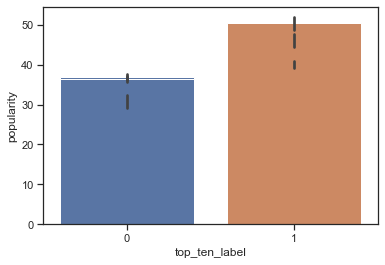

In [49]:
sns.barplot(x=train.explicit, y=train.popularity)
sns.barplot(x=train.is_featured_artist, y=train.popularity)
sns.barplot(x=train.top_ten_label, y=train.popularity)

plt.show()

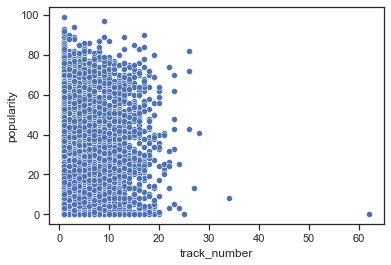

In [50]:
sns.scatterplot(x=train.track_number, y=train.popularity)

## Creating a Visual for Presentation - Top Drivers in One Plot

In [51]:
train.columns

Index(['release_year', 'release_month', 'release_day', 'artist', 'album',
       'release_date', 'track_name', 'album_popularity', 'label',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'explicit', 'popularity', 'disc_number',
       'track_number', 'album_id', 'album_type', 'duration_seconds',
       'duration_minutes', 'is_featured_artist', 'decade',
       'is_top_billboard_label', 'top_ten_label', 'release_year_bins',
       'is_november', 'popularity_bins', 'high_popularity', 'dance_bins'],
      dtype='object')

In [52]:
# finding average by boolean
train[train.is_featured_artist == 1].popularity.mean()

45.959375

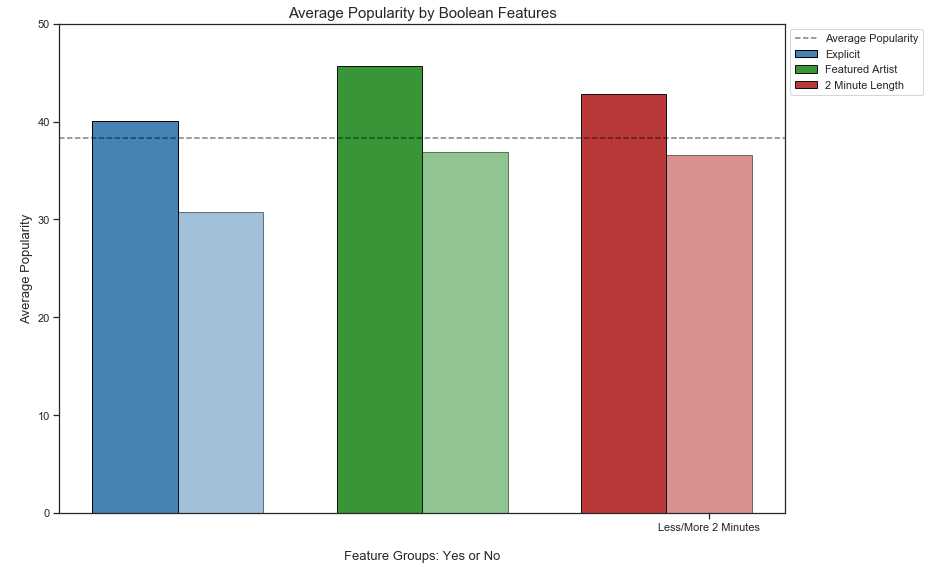

In [53]:
plt.figure(figsize=(13,9))
ax = plt.subplot(111)

ax.bar(1, 40.019, width=0.35, color='steelblue', align='center', label='Explicit', edgecolor='black', tick_label='Explicit')
ax.bar(1.35, 30.797, width=0.35, color='steelblue', align='center', alpha=.5, label='__no_legend__', edgecolor='black', tick_label='Not Explicit')

ax.bar(2, 45.734, width=0.35, color='forestgreen', align='center', alpha=.9, label='Featured Artist', edgecolor='black', tick_label='Has Featured Artist(s)')
ax.bar(2.35, 36.887, width=0.35, color='forestgreen', align='center', alpha=.5, label='__no_legend__', edgecolor='black', tick_label='No Featured Artist(s)')

ax.bar(3, 42.821, width=0.35, color='firebrick', align='center', alpha=.9, label='2 Minute Length', edgecolor='black', tick_label='2 Minutes')
ax.bar(3.35, 36.58, width=0.35, color='firebrick', align='center', alpha=.5, label='__no_legend__', edgecolor='black', tick_label='Less/More 2 Minutes')

plt.axhline(train.popularity.mean(), color='black', linestyle='--', alpha=.5, label='Average Popularity')

plt.title('Average Popularity by Boolean Features', size=15)
plt.ylabel('\nAverage Popularity', size=13)
plt.xlabel('\nFeature Groups: Yes or No', size=13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylim(0,50)
plt.show()

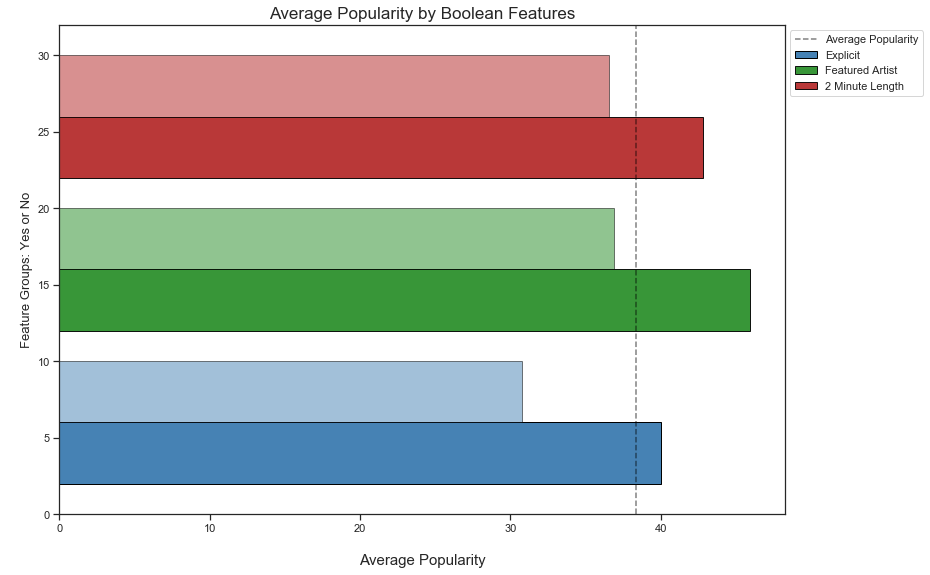

In [54]:
plt.figure(figsize=(13,9))
ax = plt.subplot(111)

ax.barh(4,40.019, 4, color='steelblue', align='center', label='Explicit', edgecolor='black')
ax.barh(8, 30.797, 4, color='steelblue', align='center', alpha=.5, label='__no_legend__', edgecolor='black')

ax.barh(14, 45.95, 4, color='forestgreen', align='center', alpha=.9, label='Featured Artist', edgecolor='black')
ax.barh(18, 36.887, 4, color='forestgreen', align='center', alpha=.5, label='__no_legend__', edgecolor='black')

ax.barh(24, 42.82, 4, color='firebrick', align='center', alpha=.9, label='2 Minute Length', edgecolor='black')
ax.barh(28, 36.57, 4, color='firebrick', align='center', alpha=.5, label='__no_legend__', edgecolor='black')

plt.axvline(train.popularity.mean(), color='black', linestyle='--', alpha=.5, label='Average Popularity')

plt.title('Average Popularity by Boolean Features', size=17)
plt.xlabel('\nAverage Popularity', size=15)
plt.ylabel('\nFeature Groups: Yes or No', size=13)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.ylim(0,32)
plt.show()

## What Record Labels Would We Recommend to Artists?
- check averages by record labels, checing with and without observation counts
- are the top record labels found in our data statistically higher in average than the overall?

In [55]:
train.label.value_counts()

Def Jam Recordings         97
Rockstarr Music Group      72
Columbia                   64
Atlantic Records           63
Atlantic Records/ATG       57
                           ..
Scheme Records / EMPIRE     1
GRXM MAFIA                  1
La Vendicion Records        1
GRXTESQUE                   1
Audra The Rapper            1
Name: label, Length: 1086, dtype: int64

In [56]:
# from matthew's explore
def get_labels_features(df):
    biggest_labels = df.groupby('label').popularity.agg(['mean', 'count']).sort_values(by=['count', 'mean'], ascending=False).head(20)
    top_ten_labels = list(biggest_labels.sort_values(by='mean', ascending=False).head(10).index)
    top_five_labels = list(biggest_labels.sort_values(by='mean', ascending=False).head(5).index)
    worst_ten_labels = list(biggest_labels.sort_values(by='mean').head(10).index)
    worst_five_labels = list(biggest_labels.sort_values(by='mean').head(5).index)
    pattern1 = '|'.join(top_ten_labels)
    pattern2 = '|'.join(top_ten_labels)
    pattern3 = '|'.join(top_ten_labels)
    pattern4 = '|'.join(top_ten_labels)
    df['top_ten_label'] = df.label.str.contains(pattern1)
    df['top_five_label'] = df.label.str.contains(pattern1)
    df['worst_ten_label'] = df.label.str.contains(pattern1)
    df['worst_five_label'] = df.label.str.contains(pattern1)
    df['top_ten_label'] = df.top_ten_label.astype('int')
    df['top_five_label'] = df.top_five_label.astype('int')
    df['worst_ten_label'] = df.worst_ten_label.astype('int')
    df['worst_five_label'] = df.worst_five_label.astype('int')
    return df

In [57]:
df2 = get_labels_features(train)

In [58]:
biggest_labels = train.groupby('label').popularity.agg(['mean', 'count']).sort_values(by=['count', 'mean'], ascending=False).head(20)
biggest_labels

,mean,count
label,,
Def Jam Recordings,43.257732,97
Rockstarr Music Group,8.013889,72
Columbia,58.312500,64
Atlantic Records,37.777778,63
Atlantic Records/ATG,33.333333,57
Nicki Minaj/Cash Money,44.185185,54
300 Entertainment,63.018868,53
"G59 Records, LLC",46.760000,50
Universal Music Group,0.060000,50


In [66]:
high_popularity = train[train.popularity_bins == 'High'].groupby('label').popularity_bins.agg(['count']).sort_values(by=['count'], ascending=False)
high_popularity

,count
label,
Columbia,18
300 Entertainment,13
Generation Now/Atlantic,9
Bad Vibes Forever / EMPIRE,7
Kemosabe Records/RCA Records,6
...,...
Epic/Freebandz/A1,1
Epic Amsterdam,1
Doomshop Records/RCA Records,1


In [67]:
top_labels = pd.merge(left=biggest_labels, right=high_popularity, how='left', on='label').fillna(0)

In [68]:
top_labels.columns = ['avg_popularity','song_count','high_popularity_count']

In [69]:
top_labels['high_popularity_percentage'] = round((top_labels.high_popularity_count / top_labels.song_count) * 100,2)

In [70]:
top_labels.high_popularity_count = top_labels.high_popularity_count.astype('int')

In [71]:
top_labels

,avg_popularity,song_count,high_popularity_count,high_popularity_percentage
label,,,,
Def Jam Recordings,43.257732,97,3,3.09
Rockstarr Music Group,8.013889,72,0,0.00
Columbia,58.312500,64,18,28.12
Atlantic Records,37.777778,63,4,6.35
Atlantic Records/ATG,33.333333,57,0,0.00
Nicki Minaj/Cash Money,44.185185,54,1,1.85
300 Entertainment,63.018868,53,13,24.53
"G59 Records, LLC",46.760000,50,3,6.00
Universal Music Group,0.060000,50,0,0.00


### Let's add key drivers to df
- what is the labels average for the key features?

In [86]:
danceability_means = []
for label in top_labels.index:
    danceability_means.append((round(train[train.label == label].danceability.mean(),2)))
    
top_labels['danceability_means'] = danceability_means

In [88]:
explicit_means = []
for label in top_labels.index:
    explicit_means.append((round(train[train.label == label].explicit.mean(),2)))
    
top_labels['explicit_means'] = explicit_means

In [90]:
feat_artist_means = []
for label in top_labels.index:
    feat_artist_means.append((round(train[train.label == label].is_featured_artist.mean(),2)))
    
top_labels['featured_artist_means'] = feat_artist_means

In [91]:
top_labels

,avg_popularity,song_count,high_popularity_count,high_popularity_percentage,danceability_means,explicit_means,featured_artist_means
label,,,,,,,
Def Jam Recordings,43.257732,97,3,3.09,0.72,0.82,0.05
Rockstarr Music Group,8.013889,72,0,0.00,0.73,1.00,0.00
Columbia,58.312500,64,18,28.12,0.74,0.80,0.30
Atlantic Records,37.777778,63,4,6.35,0.73,0.86,0.46
Atlantic Records/ATG,33.333333,57,0,0.00,0.77,0.98,0.47
Nicki Minaj/Cash Money,44.185185,54,1,1.85,0.68,0.98,0.00
300 Entertainment,63.018868,53,13,24.53,0.83,1.00,0.34
"G59 Records, LLC",46.760000,50,3,6.00,0.78,1.00,0.00
Universal Music Group,0.060000,50,0,0.00,0.75,0.92,0.00


# Top 5 Record Labels by Average
1. Generation Now/Atlantic
2. 300 Entertainment
3. Columbia
4. Republic Records
5. G59 Records, LLC

# Top 5 By High Popularity Percentage
1. 300 Entertainment
2. Generation Now/Atlantic
3. Columbia
4. Republic Records
5. G59 Records, LLC

### Same by Either Metric
## What are the songs by the top 3 record labels like? Are they doing something different?

In [73]:
top_3_label_df = train[(train.label == '300 Entertainment') | (train.label == 'Generation Now/Atlantic') | (train.label == 'Columbia')]

In [74]:
top_3_label_df[top_3_label_df.label == 'Generation Now/Atlantic'].is_featured_artist.mean()

0.17073170731707318

In [80]:
train.is_featured_artist.mean()

0.15952143569292124

In [76]:
top_3_label_df.sort_values(by='popularity', ascending=False)

,release_year,release_month,release_day,artist,album,release_date,track_name,album_popularity,label,danceability,...,is_top_billboard_label,top_ten_label,release_year_bins,is_november,popularity_bins,high_popularity,dance_bins,top_five_label,worst_ten_label,worst_five_label
track_id,,,,,,,,,,,,,,,,,,,,,
6zFMeegAMYQo0mt8rXtrli,2020,11,13,lil nas x,holiday,2020-11-13,holiday,85,Columbia,0.810,...,1,1,2019_2020,True,High,False,medium,1,1,1
0A1hoCfMLkiAgvhWkkucJa,2020,11,20,megan thee stallion,good news,2020-11-20,body,88,300 Entertainment,0.914,...,0,1,2019_2020,True,High,False,high,1,1,1
4w47S36wQGBhGg073q3nt7,2020,05,28,rosalía,tkn (feat. travis scott),2020-05-28,tkn (feat. travis scott),77,Columbia,0.776,...,1,1,2019_2020,False,High,False,medium,1,1,1
2YpeDb67231RjR0MgVLzsG,2019,06,21,lil nas x,7 ep,2019-06-21,old town road - remix,82,Columbia,0.878,...,1,1,2019_2020,False,High,False,high,1,1,1
0k7wmahjkn389wAZdz19Cv,2020,11,13,future,pluto x baby pluto,2020-11-13,drankin n smokin,86,Generation Now/Atlantic,0.752,...,0,1,2019_2020,True,High,False,medium,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3Q6F8RByyhRTJpRtZLY3cg,2020,01,21,jack harlow,whats poppin,2020-01-21,whats poppin,13,Generation Now/Atlantic,0.923,...,0,1,2019_2020,False,Low,False,high,1,1,1
0Dn40gxVCMo5TkgS8Ik18Q,2018,09,19,lil peep,falling down (bonus track),2018-09-19,falling down - bonus track,1,Columbia,0.669,...,1,1,2017_2018,False,Very Low,False,low,1,1,1
2gfypzU0M3Gsjrcx0uyQuP,1994,04,19,nas,illmatic,1994-04-19,n.y. state of mind,0,Columbia,0.707,...,1,1,1983_2003,False,Very Low,False,medium,1,1,1


year mean: 2019.0 
year avg: 2016.0


Text(0.5, 1.0, 'Relase Years from Top 3 Record Labels')

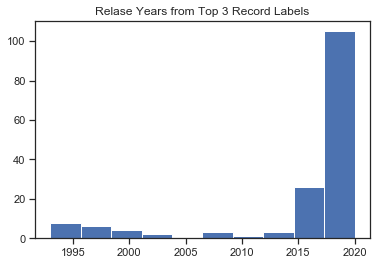

In [75]:
print('year mean:', top_3_label_df.release_year.median(), '\nyear avg:', round(top_3_label_df.release_year.mean(),0))

plt.hist(top_3_label_df.release_year)
plt.title('Relase Years from Top 3 Record Labels')

Text(0.5, 1.0, 'Distribution of Danceability in Top 3 Labels')

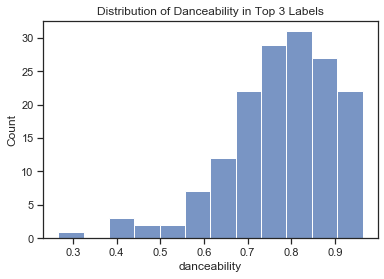

In [77]:
sns.histplot(x=top_3_label_df.danceability)
plt.title('Distribution of Danceability in Top 3 Labels')

Text(0.5, 1.0, 'Distribution of Danceability in Train')

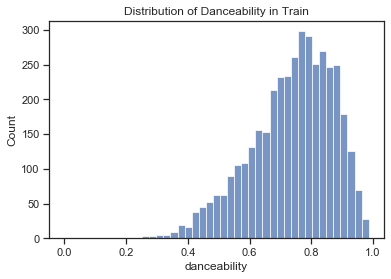

In [78]:
sns.histplot(x=train.danceability)
plt.title('Distribution of Danceability in Train')

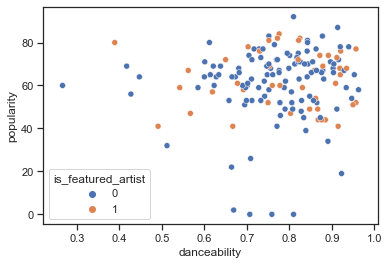

In [79]:
sns.scatterplot(x=top_3_label_df.danceability, y=top_3_label_df.popularity, hue=top_3_label_df.is_featured_artist)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


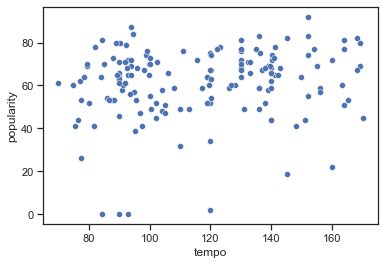

In [93]:
sns.scatterplot(top_3_label_df.tempo, top_3_label_df.popularity)

### Conclusions
- release_year significantly influences a song's popularity
- songs in 2020 have a significantly higher popularity average than the overall popularity average
- danceability has a lower but still positive correlation with popularity
    - not as strong a correlation as release year
- no viable clusters found yet

### Next Steps
- clean up visuals